In [2]:
import pickle
import matplotlib.pyplot as plt
import numpy as np

In [35]:
plt.rcParams.update({
	"pgf.texsystem": "pdflatex",
	'font.family': 'serif',
	'font.size' : 15,               	# Set font size to 11pt
	'axes.labelsize': 15,           	# -> axis labels
	'xtick.labelsize':12,
	'ytick.labelsize':12,
	'legend.fontsize': 12,
	'lines.linewidth':2,
	'text.usetex': False,
	'pgf.rcfonts': False,
})
plt.tight_layout(rect=[0, 0.03, 1, 0.85])

<Figure size 640x480 with 0 Axes>

## CIFAR 10 accuracies and values

Went with 50 teachers and shaders21k backbone

| Num teachers     |   Method       |   Avg Accuracy  |
| :----------------: | :--------------: | :-------------: |
| 50              |   from scratch |   41.25% |  
| 50              |  **shaders21k**   |  46.72%  |
| 75              |   from scratch     |   35.17%  |
| 75              |   shaders21k   |   44.43%  |
| 100              |   shaders21k   |   42.68%  |

Privacy params: {"threshold": 50, "sigma_threshold": 30, "sigma_gnmax": 15, "epsilon": eps, "delta" : 1e-5}

In [36]:
with open("results/CIFAR10_no_SSL_50teachers.pkl", "rb") as f:    
    d = pickle.load(f)
print(d)


CIFAR10_no_accuracies_wo_10 = d["accuracies_wo"]
CIFAR10_no_accuracies_wo_10_std = d["accuracies_wo_std"]
CIFAR10_no_accuracies_with_10 = d["accuracies_with"]
CIFAR10_no_accuracies_with_10_std = d["accuracies_with_std"]

CIFAR10_no_samples_wo_10 = d["num_answered_wo"]
CIFAR10_no_samples_with_10 = d["num_answered_with"]

with open("results/CIFAR10_with_SSL_50teachers.pkl", "rb") as f:    
    d = pickle.load(f)
print(d)


CIFAR10_SSL_accuracies_wo_10 = d["accuracies_wo"]
CIFAR10_SSL_accuracies_wo_10_std = d["accuracies_wo_std"]
CIFAR10_SSL_accuracies_with_10 = d["accuracies_with"]
CIFAR10_SSL_accuracies_with_10_std = d["accuracies_with_std"]

CIFAR10_SSL_samples_wo_10 = d["num_answered_wo"]
CIFAR10_SSL_samples_with_10 = d["num_answered_with"]

{'accuracies_wo': {'noise_CIFAR10': [0.11175130208333334], 'dead_leaves_CIFAR10': [0.18046874999999998], 'stylegan_CIFAR10': [0.17783203125], 'Shaders21k_CIFAR10': [0.20065104166666667], 'CIFAR10': [0.3036783854166667]}, 'accuracies_wo_std': {'noise_CIFAR10': [0.010067702102461865], 'dead_leaves_CIFAR10': [0.006750300647963067], 'stylegan_CIFAR10': [0.013173824505420194], 'Shaders21k_CIFAR10': [0.011623509829958596], 'CIFAR10': [0.01960959763250665]}, 'accuracies_with': {'noise_CIFAR10': [0.10625], 'dead_leaves_CIFAR10': [0.15807291666666667], 'stylegan_CIFAR10': [0.18258463541666667], 'Shaders21k_CIFAR10': [0.21285807291666667], 'CIFAR10': [0.30413411458333334]}, 'accuracies_with_std': {'noise_CIFAR10': [0.007383656394670413], 'dead_leaves_CIFAR10': [0.022727462690696195], 'stylegan_CIFAR10': [0.009512451756349861], 'Shaders21k_CIFAR10': [0.008654692373897852], 'CIFAR10': [0.009716456080881616]}, 'num_answered_wo': {'noise_CIFAR10': [481.0], 'dead_leaves_CIFAR10': [308.3333333333333],

In [37]:

old=["noise_CIFAR10", "dead_leaves_CIFAR10",  "stylegan_CIFAR10", "Shaders21k_CIFAR10"]
new = ["Noise", "Leaves", "StyleGAN", "Shaders"]

for i in range(len(old)):
    CIFAR10_no_accuracies_wo_10[new[i]] = CIFAR10_no_accuracies_wo_10.pop(old[i])
    CIFAR10_no_accuracies_with_10[new[i]] = CIFAR10_no_accuracies_with_10.pop(old[i])

CIFAR10_no_accuracies_wo_10  = dict(sorted(CIFAR10_no_accuracies_wo_10.items(), key=lambda item: item[1]))
CIFAR10_no_accuracies_with_10= {key: CIFAR10_no_accuracies_with_10[key] for key in CIFAR10_no_accuracies_wo_10}

for i in range(len(old)):
    CIFAR10_SSL_accuracies_wo_10[new[i]] = CIFAR10_SSL_accuracies_wo_10.pop(old[i])
    CIFAR10_SSL_accuracies_with_10[new[i]] = CIFAR10_SSL_accuracies_with_10.pop(old[i])

CIFAR10_SSL_accuracies_wo_10  = {key: CIFAR10_SSL_accuracies_wo_10[key] for key in CIFAR10_no_accuracies_wo_10}
CIFAR10_SSL_accuracies_with_10= {key: CIFAR10_SSL_accuracies_with_10[key] for key in CIFAR10_no_accuracies_wo_10}

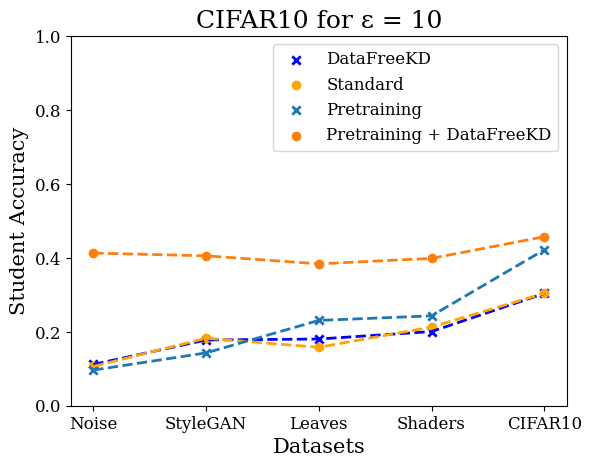

In [38]:
keys = list(CIFAR10_no_accuracies_wo_10.keys())
no_SSL_acc_wo = list(CIFAR10_no_accuracies_wo_10.values())
no_SSL_acc_with = list(CIFAR10_no_accuracies_with_10.values())

SSL_acc_wo = list(CIFAR10_SSL_accuracies_wo_10.values())
SSL_acc_with = list(CIFAR10_SSL_accuracies_with_10.values())



plt.figure()
plt.ylim(0, 1)

plt.scatter(keys, no_SSL_acc_wo, color="blue", label="Standard + DataFreeKD", marker="x")
plt.plot(keys, no_SSL_acc_wo, color="blue", linestyle="dashed")    

plt.scatter(keys, no_SSL_acc_with, color="orange", label="Standard")
plt.plot(keys, no_SSL_acc_with, color="orange", linestyle="dashed")

plt.scatter(keys, SSL_acc_wo, label="Pretraining", marker="x")
plt.plot(keys, SSL_acc_wo,  linestyle="dashed")    

plt.scatter(keys, SSL_acc_with, label="Pretraining + DataFreeKD")
plt.plot(keys, SSL_acc_with, linestyle="dashed")

plt.legend()
plt.title("CIFAR10 for ε = 10")

plt.xlabel("Datasets")
plt.ylabel("Student Accuracy")


plt.savefig("plots/CIFAR10_compare_eps_10.pdf")

## MNIST values

MNIST backbone: StyleGAN with **200** teachers


| Num teachers     |   Method       |   Avg Accuracy  |
| :----------------: | :--------------: | :-------------: |
| 200              |   from scratch |   85.97% |  
| 200              |  dead_leaves   |  84.46%  |
| **200**              |   **stylegan**     |   85.13%  |
| 200              |   shaders21k   |   76.14%  |
| 300              |   from scratch |   76.89% |  
| 300              |  dead_leaves   |  82.48%  |
| 300              |   **stylegan**     |   83.05%  |
| 300              |   shaders21k   |   73.73%  |

Privacy params: {"threshold": 200, "sigma_threshold": 120, "sigma_gnmax": 40, "epsilon": epsilon, "delta" : 1e-5}

In [15]:
with open("results/MNIST_with_SSL_200teachers.pkl", "rb") as f:    #[1, 5, 10, 20]
    d = pickle.load(f)
print(d)

MNIST_SSL_accuracies_wo = d["accuracies_wo"]
MNIST_SSL_accuracies_wo_std = d["accuracies_wo_std"]
MNIST_SSL_accuracies_with = d["accuracies_with"]
MNIST_SSL_accuracies_with_std = d["accuracies_with_std"]

MNIST_SSL_num_samples_wo = d["num_answered_wo"]
MNIST_SSL_num_samples_with = d["num_answered_with"]

with open("results/MNIST_no_SSL_200teachers_eps10.pkl", "rb") as f:    #[10]
    d = pickle.load(f)
print(d)

MNIST_no_accuracies_wo_10 = d["accuracies_wo"]
MNIST_no_accuracies_wo_10_std = d["accuracies_wo_std"]
MNIST_no_accuracies_with_10 = d["accuracies_with"]
MNIST_no_accuracies_with_10_std = d["accuracies_with_std"]

MNIST_no_num_samples_10_wo = d["num_answered_wo"]
MNIST_no_num_samples_10_with = d["num_answered_with"]

{'accuracies_wo': {'noise_MNIST': [0.14653445512820515, 0.1417267628205128, 0.14562049278846154, 0.15630008012820515], 'dead_leaves': [0.27586638621794873, 0.3639322916666667, 0.3608648838141026, 0.369140625], 'FractalDB': [0.11100260416666667, 0.15781500400641027, 0.16458834134615383, 0.17371544471153846], 'stylegan': [0.2820137219551282, 0.41749298878205127, 0.4440980568910257, 0.4527744391025641], 'Shaders21k': [0.22529797676282048, 0.3507361778846154, 0.3674128605769231, 0.3767402844551282], 'FMNIST': [0.2501377203525641, 0.38391426282051283, 0.42619441105769235, 0.4323918269230769], 'MNIST': [0.7991160857371794, 0.9035206330128206, 0.9175430689102564, 0.9188451522435898]}, 'accuracies_wo_std': {'noise_MNIST': [0.00750258154479695, 0.008020016300218166, 0.007780351271259979, 0.001811817784469223], 'dead_leaves': [0.018232459756771048, 0.021191004001503772, 0.008987796072025605, 0.0030501634996579503], 'FractalDB': [0.00842945037503505, 0.008853052681972486, 0.008544295850465296, 0.

In [12]:
MNIST_SSL_accuracies_wo_10 = {}
MNIST_SSL_accuracies_with_10 = {}

for ds in MNIST_SSL_accuracies_with.keys():
    MNIST_SSL_accuracies_wo_10[ds] = MNIST_SSL_accuracies_wo[ds][2]
    MNIST_SSL_accuracies_with_10[ds] = MNIST_SSL_accuracies_with[ds][2]


old=["noise_MNIST", "dead_leaves",  "stylegan", "Shaders21k", "FractalDB", "FMNIST"]
new = ["Noise", "Leaves", "StyleGAN", "Shaders", "Fractal", "Fashion"]

for i in range(len(old)):
    MNIST_SSL_accuracies_with_10[new[i]] = MNIST_SSL_accuracies_with_10.pop(old[i])
    MNIST_SSL_accuracies_wo_10[new[i]] = MNIST_SSL_accuracies_wo_10.pop(old[i])

MNIST_SSL_accuracies_wo_10  = dict(sorted(MNIST_SSL_accuracies_wo_10.items(), key=lambda item: item[1]))
MNIST_SSL_accuracies_with_10= {key: MNIST_SSL_accuracies_with_10[key] for key in MNIST_SSL_accuracies_wo_10}


In [16]:
old=["noise_MNIST", "dead_leaves",  "stylegan", "Shaders21k", "FractalDB", "FMNIST"]
new = ["Noise", "Leaves", "StyleGAN", "Shaders", "Fractal", "Fashion"]

for i in range(len(old)):
    MNIST_no_accuracies_with_10[new[i]] = MNIST_no_accuracies_with_10.pop(old[i])
    MNIST_no_accuracies_wo_10[new[i]] = MNIST_no_accuracies_wo_10.pop(old[i])

MNIST_no_accuracies_wo_10  = {key: MNIST_no_accuracies_wo_10[key] for key in MNIST_SSL_accuracies_wo_10}
MNIST_no_accuracies_with_10= {key: MNIST_no_accuracies_with_10[key] for key in MNIST_no_accuracies_wo_10}

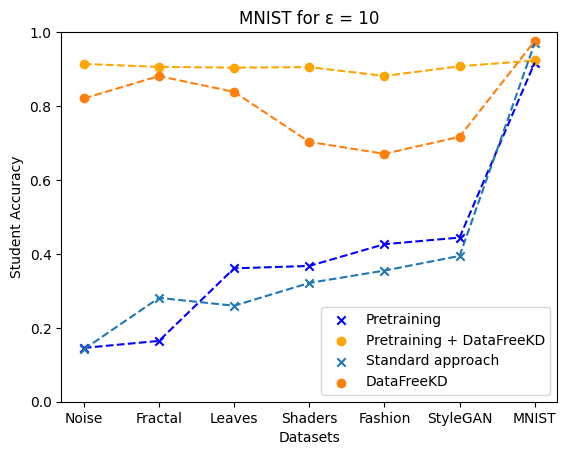

In [ ]:
keys = list(MNIST_SSL_accuracies_wo_10.keys())
SSL_acc_wo = list(MNIST_SSL_accuracies_wo_10.values())
SSL_acc_with = list(MNIST_SSL_accuracies_with_10.values())
no_acc_wo = list(MNIST_no_accuracies_wo_10.values())
no_acc_with = list(MNIST_no_accuracies_with_10.values())


plt.figure()
plt.ylim(0, 1)

plt.scatter(keys, SSL_acc_wo, color="blue", label="Pretraining", marker="x")
plt.plot(keys, SSL_acc_wo, color="blue", linestyle="dashed")    

plt.scatter(keys, SSL_acc_with, color="orange", label="Pretraining + DataFreeKD")
plt.plot(keys, SSL_acc_with, color="orange", linestyle="dashed")

plt.scatter(keys, no_acc_wo, label="Standard", marker="x")
plt.plot(keys, no_acc_wo, linestyle="dashed")    

plt.scatter(keys, no_acc_with, label="Standard + DataFreeKD")
plt.plot(keys, no_acc_with, linestyle="dashed")

plt.legend()
plt.title("MNIST for ε = 10")

plt.xlabel("Datasets")
plt.ylabel("Student Accuracy")

plt.savefig("plots/MNIST_compare_eps10.pdf")

## SVHN values

In [3]:
with open("results/SVHN_no_SSL_250teachers.pkl", "rb") as f:    
    d = pickle.load(f)
print(d)


SVHN_no_accuracies_wo_10 = d["accuracies_wo"]
SVHN_no_accuracies_wo_10_std = d["accuracies_wo_std"]
SVHN_no_accuracies_with_10 = d["accuracies_with"]
SVHN_no_accuracies_with_10_std = d["accuracies_with_std"]

SVHN_no_samples_wo_10 = d["num_answered_wo"]
SVHN_no_samples_with_10 = d["num_answered_with"]

with open("results/SVHN_half_SSL_eps10_250teachers.pkl", "rb") as f:    
    d = pickle.load(f)
print(d)


SVHN_SSL_accuracies_wo_10 = d["accuracies_wo"]
SVHN_SSL_accuracies_wo_10_std = d["accuracies_wo_std"]
SVHN_SSL_accuracies_with_10 = d["accuracies_with"]
SVHN_SSL_accuracies_with_10_std = d["accuracies_with_std"]

SVHN_SSL_samples_wo_10 = d["num_answered_wo"]
SVHN_SSL_samples_with_10 = d["num_answered_with"]

old=["noise_SVHN", "dead_leaves_SVHN",  "stylegan_SVHN", "Shaders21k_SVHN"]
new = ["Noise", "Leaves", "StyleGAN", "Shaders"]

for i in range(len(old)):
    SVHN_no_accuracies_wo_10[new[i]] = SVHN_no_accuracies_wo_10.pop(old[i])
    SVHN_no_accuracies_with_10[new[i]] = SVHN_no_accuracies_with_10.pop(old[i])
    SVHN_SSL_accuracies_wo_10[new[i]] = SVHN_SSL_accuracies_wo_10.pop(old[i])
    SVHN_SSL_accuracies_with_10[new[i]] = SVHN_SSL_accuracies_with_10.pop(old[i])


SVHN_no_accuracies_wo_10  = dict(sorted(SVHN_no_accuracies_wo_10.items(), key=lambda item: item[1]))
SVHN_no_accuracies_with_10= {key: SVHN_no_accuracies_with_10[key] for key in SVHN_no_accuracies_wo_10}
SVHN_SSL_accuracies_wo_10= {key: SVHN_SSL_accuracies_wo_10[key] for key in SVHN_no_accuracies_wo_10}
SVHN_SSL_accuracies_with_10= {key: SVHN_SSL_accuracies_with_10[key] for key in SVHN_no_accuracies_wo_10}

print(f"Num queries answered Standard: {SVHN_no_samples_wo_10}")
print(f"Num queries answered with DataFreeKD: {SVHN_no_samples_with_10}")

{'accuracies_wo': {'noise_SVHN': [0.1258958504378763], 'dead_leaves_SVHN': [0.23070678822295201], 'stylegan_SVHN': [0.36650331828133553], 'Shaders21k_SVHN': [0.4851539693942711], 'SVHN': [0.8229672676062761]}, 'accuracies_wo_std': {'noise_SVHN': [0.015732358818458192], 'dead_leaves_SVHN': [0.006432906374254639], 'stylegan_SVHN': [0.0033662546126562868], 'Shaders21k_SVHN': [0.0066250574455258655], 'SVHN': [0.006897515716917807]}, 'accuracies_with': {'noise_SVHN': [0.15088843846925745], 'dead_leaves_SVHN': [0.29676880929574895], 'stylegan_SVHN': [0.3723673257617223], 'Shaders21k_SVHN': [0.5247581132548805], 'SVHN': [0.8288134578544062]}, 'accuracies_with_std': {'noise_SVHN': [0.01031161700513], 'dead_leaves_SVHN': [0.017255029748728702], 'stylegan_SVHN': [0.010846232419723217], 'Shaders21k_SVHN': [0.029525837405028444], 'SVHN': [0.006167748341407465]}, 'num_answered_wo': {'noise_SVHN': [1445.0], 'dead_leaves_SVHN': [1658.6666666666667], 'stylegan_SVHN': [1639.3333333333333], 'Shaders21k_

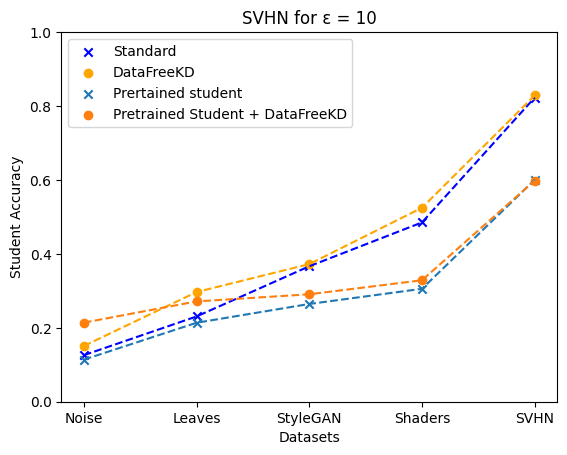

In [ ]:
keys = list(SVHN_no_accuracies_wo_10.keys())
no_SSL_acc_wo = list(SVHN_no_accuracies_wo_10.values())
no_SSL_acc_with = list(SVHN_no_accuracies_with_10.values())
SSL_acc_wo = list(SVHN_SSL_accuracies_wo_10.values())
SSL_acc_with = list(SVHN_SSL_accuracies_with_10.values())

plt.figure()
plt.ylim(0, 1)

plt.scatter(keys, no_SSL_acc_wo, color="blue", label="Standard", marker="x")
plt.plot(keys, no_SSL_acc_wo, color="blue", linestyle="dashed")    

plt.scatter(keys, no_SSL_acc_with, color="orange", label="Standard + DataFreeKD")
plt.plot(keys, no_SSL_acc_with, color="orange", linestyle="dashed")

plt.scatter(keys, SSL_acc_wo, label="Prertained student", marker="x")
plt.plot(keys, SSL_acc_wo, linestyle="dashed")    

plt.scatter(keys, SSL_acc_with, label="Pretrained Student + DataFreeKD")
plt.plot(keys, SSL_acc_with, linestyle="dashed")

plt.legend()
plt.title("SVHN for ε = 10")

plt.xlabel("Datasets")
plt.ylabel("Student Accuracy")

plt.savefig("plots/SVHN_compare_eps_10.pdf")

## TissueMNIST values

TissueMNIST backbone: StyleGAN

| Num teachers     |   Method       |   Avg Accuracy  |
| :----------------: | :--------------: | :-------------: |
| 250              |   from scratch |   46.5% |  
| 250              |  dead_leaves   |  47.31%  |
| **250**              |   **stylegan**     |   48.8%  |
| 250              |   shaders21k   |   43.57%  |

Params: 


In [51]:
with open("results/TissueMNIST_with_SSL_250teachers_eps10.pkl", "rb") as f:    
    d = pickle.load(f)
print(d)

TMNIST_SSL_accuracies_wo = d["accuracies_wo"]
TMNIST_SSL_accuracies_wo_std = d["accuracies_wo_std"]
TMNIST_SSL_accuracies_with = d["accuracies_with"]
TMNIST_SSL_accuracies_with_std = d["accuracies_with_std"]

TMNIST_SSL_num_samples_wo = d["num_answered_wo"]
TMNIST_SSL_num_samples_with = d["num_answered_with"]

with open("results/TissueMNIST_with_SSL_250teachers_eps10.pkl", "rb") as f:    
    d = pickle.load(f)
print(d)

TMNIST_no_accuracies_wo = d["accuracies_wo"]
TMNIST_no_accuracies_wo_std = d["accuracies_wo_std"]
TMNIST_no_accuracies_with = d["accuracies_with"]
TMNIST_no_accuracies_with_std = d["accuracies_with_std"]

TMNIST_no_num_samples_wo = d["num_answered_wo"]
TMNIST_no_num_samples_with = d["num_answered_with"]

{'accuracies_wo': {'noise_MNIST': [0.32106090465465464], 'dead_leaves': [0.3281390765765766], 'FractalDB': [0.32124859234234243], 'stylegan': [0.41871715465465464], 'Shaders21k': [0.47127909159159165], 'FMNIST': [0.4387528153153153], 'TissueMNIST': [0.49506850600600605]}, 'accuracies_wo_std': {'noise_MNIST': [1.1962789774747066e-05], 'dead_leaves': [0.0013922296431957192], 'FractalDB': [0.00025860322453369577], 'stylegan': [0.006648371074466278], 'Shaders21k': [0.0007173608432383322], 'FMNIST': [0.0014433811642577048], 'TissueMNIST': [0.000595622005020364]}, 'accuracies_with': {'noise_MNIST': [0.4845908408408408], 'dead_leaves': [0.4845673798798799], 'FractalDB': [0.47564517642642645], 'stylegan': [0.48791291291291294], 'Shaders21k': [0.4899774774774775], 'FMNIST': [0.4808769707207207], 'TissueMNIST': [0.49349896771771773]}, 'accuracies_with_std': {'noise_MNIST': [0.0005279915195833702], 'dead_leaves': [0.001946222113090084], 'FractalDB': [0.0020900464079198398], 'stylegan': [0.0004667

In [52]:

old=["noise_MNIST", "dead_leaves",  "stylegan", "Shaders21k", "FractalDB", "FMNIST"]
new = ["Noise", "Leaves", "StyleGAN", "Shaders", "Fractal", "Fashion"]

for i in range(len(old)):
    TMNIST_no_accuracies_wo[new[i]] = TMNIST_no_accuracies_wo.pop(old[i])
    TMNIST_no_accuracies_with[new[i]] = TMNIST_no_accuracies_with.pop(old[i])
    

for i in range(len(old)):
    TMNIST_SSL_accuracies_wo[new[i]] = TMNIST_SSL_accuracies_wo.pop(old[i])
    TMNIST_SSL_accuracies_with[new[i]] = TMNIST_SSL_accuracies_with.pop(old[i])

TMNIST_SSL_accuracies_wo  = dict(sorted(TMNIST_SSL_accuracies_wo.items(), key=lambda item: item[1]))
TMNIST_SSL_accuracies_with= {key: TMNIST_SSL_accuracies_with[key] for key in TMNIST_SSL_accuracies_wo}
TMNIST_no_accuracies_with  = {key: TMNIST_no_accuracies_with[key] for key in TMNIST_SSL_accuracies_wo}
TMNIST_no_accuracies_wo= {key: TMNIST_no_accuracies_wo[key] for key in TMNIST_SSL_accuracies_wo}

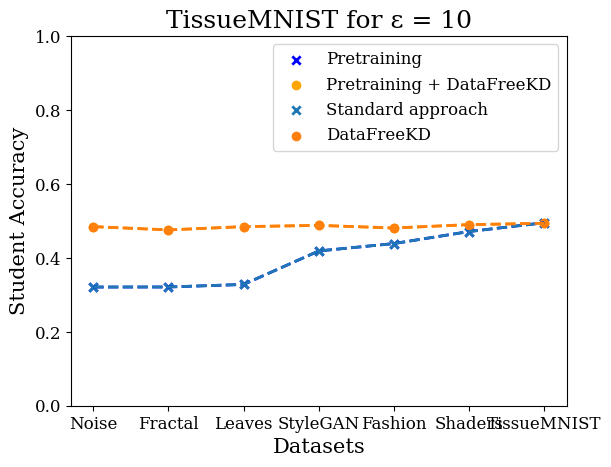

In [53]:
keys = list(TMNIST_SSL_accuracies_wo.keys())
SSL_acc_wo = list(TMNIST_SSL_accuracies_wo.values())
SSL_acc_with = list(TMNIST_SSL_accuracies_with.values())
no_acc_wo = list(TMNIST_no_accuracies_wo.values())
no_acc_with = list(TMNIST_no_accuracies_with.values())


plt.figure()
plt.ylim(0, 1)

plt.scatter(keys, SSL_acc_wo, color="blue", label="Pretraining", marker="x")
plt.plot(keys, SSL_acc_wo, color="blue", linestyle="dashed")    

plt.scatter(keys, SSL_acc_with, color="orange", label="Pretraining + DataFreeKD")
plt.plot(keys, SSL_acc_with, color="orange", linestyle="dashed")

plt.scatter(keys, no_acc_wo, label="Standard", marker="x")
plt.plot(keys, no_acc_wo, linestyle="dashed")    

plt.scatter(keys, no_acc_with, label="Standard + DataFreeKD")
plt.plot(keys, no_acc_with, linestyle="dashed")

plt.legend()
plt.title("TissueMNIST for ε = 10")

plt.xlabel("Datasets")
plt.ylabel("Student Accuracy")

plt.savefig("plots/TissueMNIST_compare_eps10.pdf")